# Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
Xtest = pd.read_csv('../data/interimStarcraft_Xtest',index_col=0)
Xtrain = pd.read_csv('../data/interimStarcraft_Xtrain',index_col=0)
ytest = pd.read_csv('../data/interimStarcraft_ytest',index_col=0)
ytrain = pd.read_csv('../data/interimStarcraft_ytrain',index_col=0)

In [3]:
ytrain=ytrain['LeagueIndex']
ytest=ytest['LeagueIndex']
ytest.shape

(835,)

# Model Selection
In the following notebook, we will be using a few different models along with their respective hyperparameter tuning to determine which model is best suited for our data set.

# Random Forest

In [13]:
maxDepth = list(range(1,50))
maxDepth.append(None)
paramGrid = {'criterion':['gini','entropy'],'max_depth':maxDepth,'min_samples_leaf':np.arange(1,50)}
rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf,paramGrid,cv=5)
rf_cv.fit(X=Xtrain,y=ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [14]:
rf_cv.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 15}

In [15]:
rf_cv.best_score_

0.42286147704590815

# Logisitic Regression

In [16]:
cParamRange = [0.001,0.01,0.1,1,10,100]
lr = LogisticRegression(random_state=42,solver='newton-cg',max_iter = 1000)
lr_cv = GridSearchCV(lr,{'C':cParamRange},cv=5)
lr_cv.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='newton-cg'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [17]:
lr_cv.best_params_

{'C': 0.1}

In [18]:
lr_cv.best_score_

0.4288654690618762

# KNN

In [19]:
nNeighbors = [1,3,5,7,9,11]
paramGrid = {'n_neighbors':nNeighbors,'weights':['uniform', 'distance']}
knn=KNeighborsClassifier()
knn_cv = GridSearchCV(knn,paramGrid,cv=5)
knn_cv.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [20]:
knn_cv.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [21]:
knn_cv.best_score_

0.3656998003992015

# SVM

In [34]:
paramGrid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm,paramGrid,cv=5)
svm_cv.fit(Xtrain,ytrain)
print(svm_cv.best_params_)
print(svm_cv.best_score_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.4220670658682635


# Logisitic Regression VS Random Forest VS SVM
It seems that Logistic Regression, Random Forest and SVM out perform KNN. We will now run each model on our test set and check various metrics to evaluate model performance.

Logisitic Regression accuracy score: 0.41077844311377243
Random Forest accuracy score: 0.4035928143712575
SVM accuracy score: 0.4311377245508982


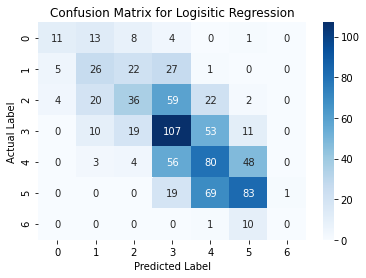

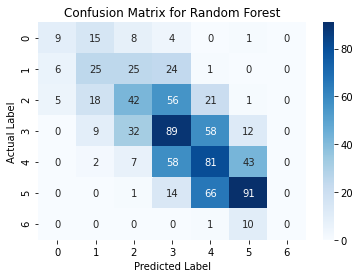

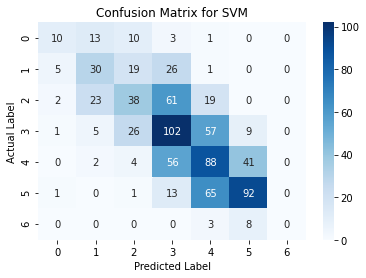

In [35]:
lr = LogisticRegression(C=.1,random_state=42,solver='newton-cg',max_iter = 1000)
rf = RandomForestClassifier(random_state=42,criterion='entropy',max_depth=6,min_samples_leaf=15)
svm = SVC(random_state=42,C=1000,gamma=.001,kernel='rbf')
lr.fit(Xtrain,ytrain)
rf.fit(Xtrain,ytrain)
svm.fit(Xtrain,ytrain)
ypredLR = lr.predict(Xtest)
ypredRF = rf.predict(Xtest)
ypredSVM= svm.predict(Xtest)
print('Logisitic Regression accuracy score: '+str(lr.score(Xtest,ytest)))
print('Random Forest accuracy score: '+str(rf.score(Xtest,ytest)))
print('SVM accuracy score: '+str(svm.score(Xtest,ytest)))
lrCnfMatrix = confusion_matrix(ytest,ypredLR)
rfCnfMatrix = confusion_matrix(ytest,ypredRF)
svmCnfMatrix = confusion_matrix(ytest,ypredSVM)
group_counts = ['{0:0.0f}'.format(value) for value in
                lrCnfMatrix.flatten()]
labels = [f'{v1}' for v1 in group_counts]
labels = np.asarray(labels).reshape(7,7)
ax = sns.heatmap(lrCnfMatrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
plt.title('Confusion Matrix for Logisitic Regression')
plt.show()
group_counts = ['{0:0.0f}'.format(value) for value in
                rfCnfMatrix.flatten()]
labels = [f'{v1}' for v1 in group_counts]
labels = np.asarray(labels).reshape(7,7)
ax = sns.heatmap(rfCnfMatrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()
group_counts = ['{0:0.0f}'.format(value) for value in
                svmCnfMatrix.flatten()]
labels = [f'{v1}' for v1 in group_counts]
labels = np.asarray(labels).reshape(7,7)
ax = sns.heatmap(svmCnfMatrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
plt.title('Confusion Matrix for SVM')
plt.show()

# Conclusion
The task of predicting League Index is a classification problem. We implemented 4 different machine learning algorithms and applied hyperparameter tuning through cross validation to determine which were viable models for use on our test set. We found that Random Forest, Logisitic Regression, and Support Vector Machines out performed KNN, though were all relatively closely grouped. We applied all three models to our test set and found their mean accuracy scores as well as plotted their confusion matrices. SVM seems to slightly outperform Random Forest and Logistic Regression, though all three models opperate in the low 40% range.

# Use Case
A low 40% accuracy score isn't very confidence inspiring, fortunately the case where we need to take a set of features and predict League Index is rather uncommon. The predicitons here are best used as a check in. Frequently when playing Starcraft II a player will feel like their league isn't a true reflection of their skill due to bad luck or any other number of factors out of their control. These predicitons are then useful to determine what your true league might be. Should it match with your actual league, it means their is skill improvement necessary and we can consult our feature importances for where to focus our time. Should we be prediciting a higher league, its an indicator that the player may have indeed hit a string of bad luck, or other factors outside of their control which influence their league index.